In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [4]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [5]:
obj2 = Series(data=[4, 7, -5, 3], index=["d", "b", "a", "c"])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [6]:
obj2.index #index对象

Index(['d', 'b', 'a', 'c'], dtype='object')

In [7]:
obj2["d"] = 6
print(obj2["a"]) #类似字典的选取值的方式，但是series可以一次性取多个
print("b" in obj2) #可以将Series看成是一个定长的有序字典，因为它是索引值到数据值的一个映射

-5
True


In [8]:
obj2[["c", "a", "d"]]

c    3
a   -5
d    6
dtype: int64

In [9]:
obj2[obj2>0] #选取值时不仅可以放index list，也可以放bool list

d    6
b    7
c    3
dtype: int64

In [10]:
print(obj2*2)
print(np.exp(obj2))

d    12
b    14
a   -10
c     6
dtype: int64
d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


In [11]:
sdata = {"Ohio":35000, "Texas":71000, "Oregon":16000, "Utah":5000}
obj3 = Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [12]:
states = ["California", "Ohio", "Oregon", "Texas"]
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [13]:
print(pd.isnull(obj4)) #检测缺失值
print(pd.notnull(obj4))

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool


In [14]:
obj4.isnull() #Series中检测缺失值的方法

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [15]:
obj3 + obj4 #Series会根据标签进行相加

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [16]:
obj4.name = "population" #series对象的name属性
obj4.index.name = "state" #series的索引index对象的name属性
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [17]:
obj.index = ["Bob", "Steve", "Jeff", "Ryan"]
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

In [18]:
data = {'state':['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
       'year':[2000,2001,2002,2001,2002,2003],
       'pop':[1.5,1.7,3.6,2.4,2.9,3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [19]:
frame.head(3)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6


In [20]:
pd.DataFrame(data, columns=["year", 'state', 'pop']) #指定列顺序

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [21]:
frame2 = pd.DataFrame(data, columns=["year", 'state', 'pop', 'debt'],
                     index=[1,2,3,4,5,6])
frame2

,year,state,pop,debt
1,2000,Ohio,1.5,NaN
2,2001,Ohio,1.7,NaN
3,2002,Ohio,3.6,NaN
4,2001,Nevada,2.4,NaN
5,2002,Nevada,2.9,NaN
6,2003,Nevada,3.2,NaN


In [22]:
frame.columns

Index(['state', 'year', 'pop'], dtype='object')

In [23]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
1,2000,Ohio,1.5,16.5
2,2001,Ohio,1.7,16.5
3,2002,Ohio,3.6,16.5
4,2001,Nevada,2.4,16.5
5,2002,Nevada,2.9,16.5
6,2003,Nevada,3.2,16.5


In [24]:
#将列表或数组赋值给某列时，长度必须一致
frame2['debt'] = np.arange(6) 
frame2

,year,state,pop,debt
1,2000,Ohio,1.5,0
2,2001,Ohio,1.7,1
3,2002,Ohio,3.6,2
4,2001,Nevada,2.4,3
5,2002,Nevada,2.9,4
6,2003,Nevada,3.2,5


In [25]:
#如果用series给dataframe的一列赋值，会精确匹配dataframe的索引
val=Series([-1.2,-1.5,-1.7], index=[2,4,5])
frame2['debt'] = val
frame2

,year,state,pop,debt
1,2000,Ohio,1.5,NaN
2,2001,Ohio,1.7,-1.2
3,2002,Ohio,3.6,NaN
4,2001,Nevada,2.4,-1.5
5,2002,Nevada,2.9,-1.7
6,2003,Nevada,3.2,NaN


In [26]:
frame2['eastern'] = frame2.state=='Ohio'
frame2

,year,state,pop,debt,eastern
1,2000,Ohio,1.5,NaN,True
2,2001,Ohio,1.7,-1.2,True
3,2002,Ohio,3.6,NaN,True
4,2001,Nevada,2.4,-1.5,False
5,2002,Nevada,2.9,-1.7,False
6,2003,Nevada,3.2,NaN,False


In [27]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [28]:
#用嵌套字典创建dataframe，外层字典的键作为列，内层键作为行索引
pop={'Nevada':{2001:2.4,2002:2.9}, 'Ohio':{2000:1.5,2001:1.7, 2002:3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [29]:
frame3.T #转置

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [30]:
pd.DataFrame(pop, index=pd.Index([2001,2002,2003]))

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


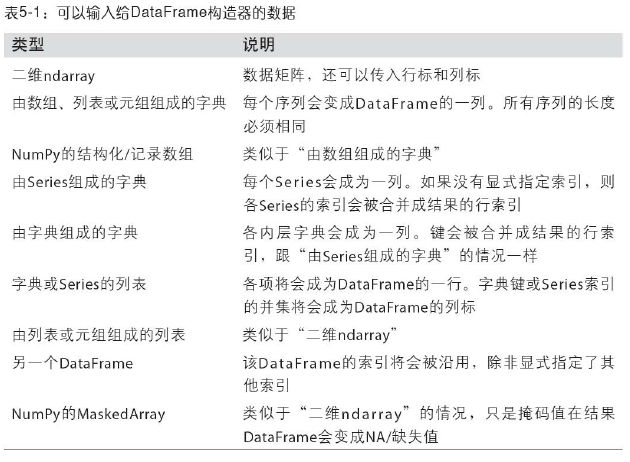

#### 索引对象

In [1]:
import pandas as pd
import numpy as np

In [3]:
#index 对象不可变，不能对其修改
#index对象 可以通过类似list切片方式进行取值
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
print(index[1:])
index[1] = 'd' 

Index(['b', 'c'], dtype='object')


TypeError: Index does not support mutable operations

In [5]:
# index对象不可变使其可以在多个数据结构之间共享
labels = pd.Index(np.arange(3))
print(labels)
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
print(obj2)
print(obj2.index is labels)

Int64Index([0, 1, 2], dtype='int64')
0    1.5
1   -2.5
2    0.0
dtype: float64
True


In [6]:
#pandas 的 Index对象可以包含重复的标签
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

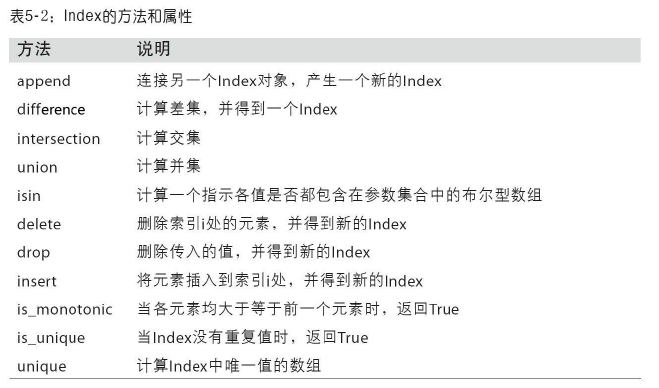

#### 重新索引

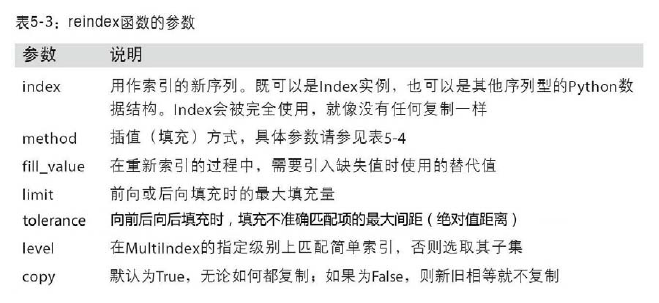

In [11]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
print(obj)
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
print(obj2)
#类似时间序列的有序数据，重新索引时可能需要做一些插值处理
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0,2,4])
print(obj3)
obj3.reindex(range(6), method='ffill') #向前插值
print(obj3)

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64
0      blue
2    purple
4    yellow
dtype: object
0      blue
2    purple
4    yellow
dtype: object


In [16]:
#dataframe使用reindex可以修改索引和列，只传递一个序列时会重新索引结果的行
frame = pd.DataFrame(np.arange(9).reshape(3,3), index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
print(frame)
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
print(frame2)
#列用columns关键字重新索引
states=[ 'Texas', 'Utah', 'California']
print(frame.reindex(columns=states))

   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8
   Ohio  Texas  California
a   0.0    1.0         2.0
b   NaN    NaN         NaN
c   3.0    4.0         5.0
d   6.0    7.0         8.0
   Texas  Utah  California
a      1   NaN           2
c      4   NaN           5
d      7   NaN           8


#### 丢弃指定轴上的值

In [19]:
print(obj)
new_obj = obj.drop("c")
print(new_obj)
print(obj.drop(["d", "c"]))

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
d    4.5
b    7.2
a   -5.3
dtype: float64
b    7.2
a   -5.3
dtype: float64


In [25]:
data = pd.DataFrame(np.arange(16).reshape(4,4),
                    index=['Ohio', 'Colorado', 'Utah', 'NewYork'],
                     columns=['one', 'two', 'three', 'four'])
print(data)
#调用drop会从行标签(axis 0)删除值
print(data.drop(["Colorado", "Ohio"]))
#axis=1 / axis="columns"删除列
print(data.drop(["two", "four"], axis='columns'))
#类似drop  会修改原值的大小或者形状，不会返回新的对象
print(obj)
obj.drop("c", inplace=True)
print(obj)

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
NewYork    12   13     14    15
         one  two  three  four
Utah       8    9     10    11
NewYork   12   13     14    15
          one  three
Ohio        0      2
Colorado    4      6
Utah        8     10
NewYork    12     14
d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
d    4.5
b    7.2
a   -5.3
dtype: float64


#### 索引、选取、过滤

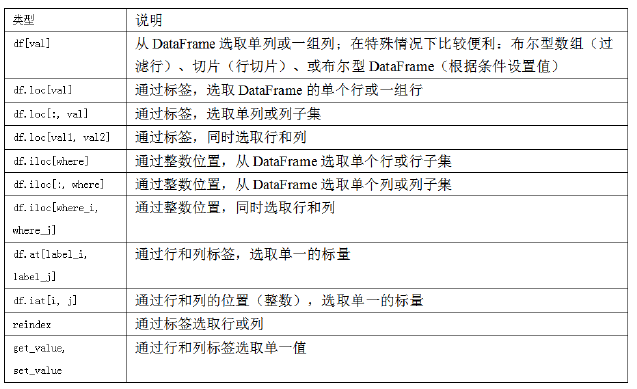

In [36]:
obj = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
print(obj['b'], obj[2])
print(obj[['b', 'a', 'd']])
print(obj[[1, 3]])
print(obj[obj<2])
#利用标签切片和普通python切片不同，末端是包含的
print(obj[2:4])
print(obj["b":"c"])

1 2
b    1
a    0
d    3
dtype: int32
b    1
d    3
dtype: int32
a    0
b    1
dtype: int32
c    2
d    3
dtype: int32
b    1
c    2
dtype: int32


In [40]:
data = pd.DataFrame(np.arange(16).reshape(4,4),
                    index=['Ohio', 'Colorado', 'Utah', 'NewYork'],
                     columns=['one', 'two', 'three', 'four'])
print(data[['two', 'four']])
#loc(轴标签) iloc(整数标签)
print(data.loc['Colorado', ["two", "three"]])
print(data.iloc[2, [3, 0, 1]])

          two  four
Ohio        1     3
Colorado    5     7
Utah        9    11
NewYork    13    15
two      5
three    6
Name: Colorado, dtype: int32
four    11
one      8
two      9
Name: Utah, dtype: int32


#### 整数索引

#### 算术运算和数据对齐 

In [41]:
#两个series做相加会按照index对齐进行运算
#dataframe数据对齐会同时发生在行和列上面，返回索引的并集，相同行列索引的值进行运算

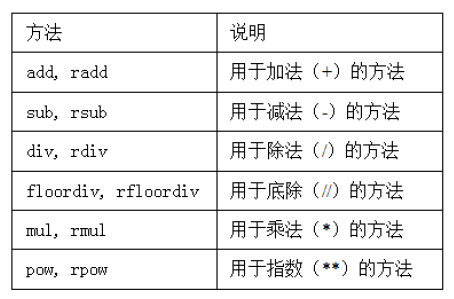

In [43]:
#使用add方法可以用参数fill_value使没有该索引的用指定值填充
df1 = pd.DataFrame(np.arange(12.).reshape((3,4)), columns=[list("abcd")])
df2 = pd.DataFrame(np.arange(20.).reshape((4,5)), columns=[list("abcde")])
df1.add(df2, fill_value=0.)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


#### 函数的应用和映射 

In [46]:
frame = pd.DataFrame(np.random.randn(4,3), columns=[list('bde')],
                    index=['utah', 'ohio','texas', 'oregon'])
print(frame)
print(np.abs(frame))
print(frame.apply(lambda x:x.max()-x.min())) #每列的最大值减去最小值
print(frame.apply(lambda x:x.max()-x.min(), axis='columns'))

               b         d         e
utah    0.803140 -0.890517 -0.524591
ohio    0.121145  0.090267 -0.871176
texas   1.240026 -0.086935  0.052021
oregon  1.252422 -0.844427  1.129338
               b         d         e
utah    0.803140  0.890517  0.524591
ohio    0.121145  0.090267  0.871176
texas   1.240026  0.086935  0.052021
oregon  1.252422  0.844427  1.129338
b    1.131276
d    0.980784
e    2.000514
dtype: float64
utah      1.693658
ohio      0.992322
texas     1.326961
oregon    2.096849
dtype: float64


In [48]:
#传递倒apply的函数不是必须返回一个标量，还可以返回由多个值组成的Series
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,0.121145,-0.890517,-0.871176
max,1.252422,0.090267,1.129338


In [50]:
#元素级的python函数也是可以用的。用applymap可以得到df中各个浮点值的格式化字符串
print(frame)
print(frame.applymap(lambda x: '%.2f'%x))

               b         d         e
utah    0.803140 -0.890517 -0.524591
ohio    0.121145  0.090267 -0.871176
texas   1.240026 -0.086935  0.052021
oregon  1.252422 -0.844427  1.129338
           b      d      e
utah    0.80  -0.89  -0.52
ohio    0.12   0.09  -0.87
texas   1.24  -0.09   0.05
oregon  1.25  -0.84   1.13


#### 排序和排名 

In [58]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
print(obj.sort_index())
frame = pd.DataFrame(np.arange(8).reshape(2,4),
                    index=['trhee', 'one'],
                    columns=list("dabc"))
print("\nsort by index:\n\n", frame.sort_index()) 
print("\nsort by columns:\n\n", frame.sort_index(axis=1))
print("\nsort by columns,降序:\n\n", frame.sort_index(axis=1, ascending=False))

a   -5.3
b    7.2
c    3.6
d    4.5
dtype: float64

sort by index:

        d  a  b  c
one    4  5  6  7
trhee  0  1  2  3

sort by columns:

        a  b  c  d
trhee  1  2  3  0
one    5  6  7  4

sort by columns,降序:

        d  c  b  a
trhee  0  3  2  1
one    4  7  6  5


In [61]:
obj = pd.Series([4,7,-3,2])
print(obj.sort_values())
obj = pd.Series([4,np.nan,7,np.nan,-3,2])
print(obj.sort_values())

2   -3
3    2
0    4
1    7
dtype: int64
4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64


In [65]:
frame=pd.DataFrame({'b':[4,7,-3,2], 'a':[0,1,0,1]})
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


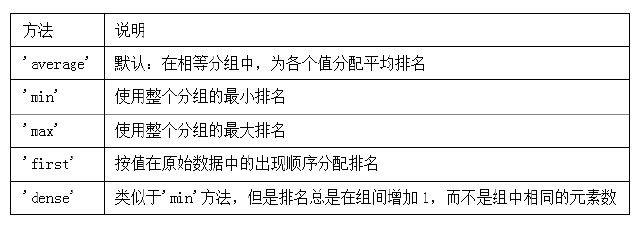

In [73]:
obj = pd.Series([7,-5,7,4,2,0,4])
print(obj.rank()) #先按从小到达排，同级的取平均值
print(obj.rank(method="first")) #从小到大排，先出现的排前面
print(obj.rank(ascending=False, method='max')) #从大到小排，同级的取最大的排名
#frame 多了axis指定对行和列排名，axis="columns"则按列排，每行的数据按列从小到大排

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64
0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64
0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64


#### 带有重复标签的轴索引 

若series或dataframe带有重复的索引,比如有多行数据的索引为a
在进行数据选取的时候df['a']就会选取多行的数据

#### 汇总和计算描述统计 

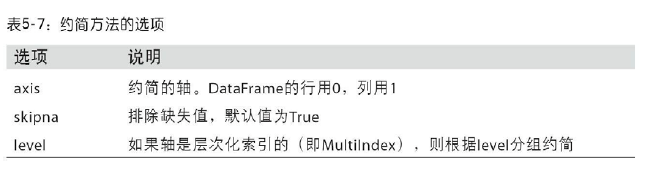

In [82]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
                 index=list("abcd"),
                 columns=['one', 'two'])
print(df)
print(df.sum()) #逐行相加
print(df.sum(axis='columns')) #逐列相加
print(df.mean(axis="columns", skipna=False))

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3
one    9.25
two   -5.80
dtype: float64
a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64
a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64


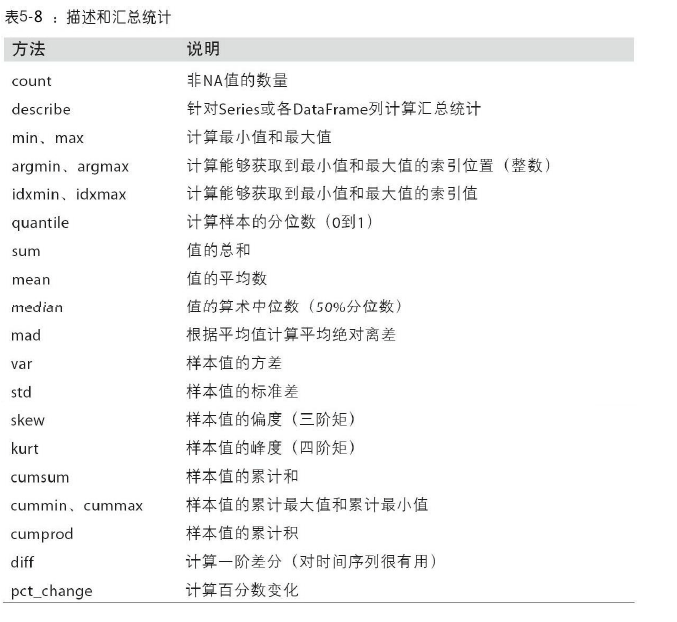

In [84]:
print(df.idxmax()) #返回每列最大值的index
print(df.cumsum()) #逐行向下累加
print(df.describe()) #数值型会返回计数均值分位数等，字符型返回其他汇总统计

one    b
two    d
dtype: object
    one  two
a  1.40  NaN
b  8.50 -4.5
c   NaN  NaN
d  9.25 -5.8


#### 协方差与相关系数P172

#### 唯一值、值计数、成员资格 

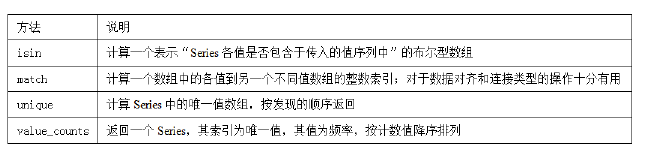

In [92]:
obj = pd.Series(list("cadaabbcc"))
uniques = obj.unique()
print(uniques)
print(obj.value_counts()) #按照频率排序
print(pd.value_counts(obj.values, sort=False)) #不排序
print(obj.isin(['b', 'c']))
print(obj[obj.isin(['b', 'c'])])
print(obj[~obj.isin(['b', 'c'])]) #~反选

['c' 'a' 'd' 'b']
c    3
a    3
b    2
d    1
dtype: int64
b    2
d    1
a    3
c    3
dtype: int64
0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool
0    c
5    b
6    b
7    c
8    c
dtype: object
1    a
2    d
3    a
4    a
dtype: object


In [96]:
to_match = pd.Series(list("cabbca"))
unique_vals = pd.Series(list("cba"))
pd.Index(unique_vals).get_indexer(to_match) #Index.get_indexer(Series)
#返回第一个索引对象index的值在to_match中对应的索引值(序号)，不存在的返回-1

array([0, 2, 1, 1, 0, 2], dtype=int64)

In [98]:
data = pd.DataFrame({'qu1':[1,3,4,3,4], 'qu2':[2,3,1,2,3], 'qu3':[1,5,2,4,4]})
print(data)
result = data.apply(pd.value_counts).fillna(0)
#pd.value_counts为返回data一列数据各个元素出现的次数
#用在apply里面就替换对应元素在该列出现的次数，位置随机，每个元素仅替换一次
#出现n次的元素则会有n-1个元素值为nan,所以最后加了fillna(0)
result

   qu1  qu2  qu3
0    1    2    1
1    3    3    5
2    4    1    2
3    3    2    4
4    4    3    4


,qu1,qu2,qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0
